In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"week39.xlsx",engine='openpyxl')

In [6]:
df.head(30)

,Country,Country Name,quarter,average download speed,average upload speed,average latency
0,AL,Shqipëria,2019-01-01,15.30,7.33,27.72
1,AT,Österreich,2019-01-01,34.15,10.89,30.95
2,BE,Belgique/België,2019-01-01,62.19,13.86,17.87
3,BG,Bulgaria,2019-01-01,40.68,30.56,12.43
4,CH,Schweiz/Suisse/Svizzera,2019-01-01,88.88,48.23,17.06
5,CY,Kýpros,2019-01-01,17.93,4.43,26.35
6,CZ,Česko,2019-01-01,36.51,17.53,21.77
7,DE,Deutschland,2019-01-01,52.51,15.16,23.28
8,DK,Danmark,2019-01-01,78.26,56.60,14.33
9,EE,Eesti,2019-01-01,45.82,31.70,22.06


In [7]:
df.loc[:,["Country","Country Name"]].values

array([['AL', 'Shqipëria'],
       ['AT', 'Österreich'],
       ['BE', 'Belgique/België'],
       ...,
       ['UA', 'Ukraine'],
       ['UK', 'United Kingdom'],
       ['XKO', 'Kosovo']], dtype=object)

In [8]:
df['Country Name'].value_counts() < 14

Eesti                      False
Liechtenstein              False
România                    False
Schweiz/Suisse/Svizzera    False
Bulgaria                   False
Norge                      False
Malta                      False
Luxembourg                 False
Shqipëria                  False
Sverige                    False
Portugal                   False
Italia                     False
United Kingdom             False
Österreich                 False
Severna Makedonija         False
Kýpros                     False
Deutschland                False
Latvija                    False
Suomi/Finland              False
Ísland                     False
Elláda                     False
Serbia                     False
Éire/Ireland               False
France                     False
Česko                      False
Slovensko                  False
Hrvatska                   False
España                     False
Polska                     False
Lietuva                    False
Crna Gora 

In [9]:
newDf = df.loc[~df['Country Name'].isin(['Kosovo','Ukraine','Moldova', 'Bosnia and Herzegovina'])]

In [10]:
newDf['Country Name'].value_counts()

Eesti                      14
Ísland                     14
România                    14
Schweiz/Suisse/Svizzera    14
Bulgaria                   14
Norge                      14
Malta                      14
Luxembourg                 14
Shqipëria                  14
Liechtenstein              14
Sverige                    14
Italia                     14
United Kingdom             14
Österreich                 14
Severna Makedonija         14
Kýpros                     14
Deutschland                14
Suomi/Finland              14
Elláda                     14
Portugal                   14
Serbia                     14
Éire/Ireland               14
France                     14
Česko                      14
Slovensko                  14
Hrvatska                   14
España                     14
Polska                     14
Lietuva                    14
Crna Gora                  14
Türkiye                    14
Belgique/België            14
Magyarország               14
Danmark   

In [11]:
cleanDf = newDf.drop("Country",axis=1).sort_values(["Country Name","quarter"]).set_index(["Country Name","quarter"])

In [12]:
cleanDf.head(9)

average download speed  average upload speed  \
Country Name    quarter                                                    
Belgique/België 2019-01-01                   62.19                 13.86   
                2019-04-01                   64.68                 13.90   
                2019-07-01                   68.24                 14.52   
                2019-10-01                   78.54                 15.45   
                2020-01-01                   76.78                 14.89   
                2020-04-01                   81.85                 16.55   
                2020-07-01                   83.71                 16.73   
                2020-10-01                   90.46                 16.97   
                2021-01-01                   95.76                 17.41   

                            average latency  
Country Name    quarter                      
Belgique/België 2019-01-01            17.87  
                2019-04-01            17.93  
                2019-07-01            16.84  
                2019-10-01            15.20  
                2020-01-01            15.23  
                2020-04-01            15.02  
                2020-07-01            15.36  
                2020-10-01            14.48  
                2021-01-01            14.11

In [14]:
cleanDf.to_csv("europe.csv")

In [13]:
cleanDf.index.levels

FrozenList([['Belgique/België', 'Bulgaria', 'Crna Gora', 'Danmark', 'Deutschland', 'Eesti', 'Elláda', 'España', 'France', 'Hrvatska', 'Italia', 'Kýpros', 'Latvija', 'Liechtenstein', 'Lietuva', 'Luxembourg', 'Magyarország', 'Malta', 'Nederland', 'Norge', 'Polska', 'Portugal', 'România', 'Schweiz/Suisse/Svizzera', 'Serbia', 'Severna Makedonija', 'Shqipëria', 'Slovenija', 'Slovensko', 'Suomi/Finland', 'Sverige', 'Türkiye', 'United Kingdom', 'Éire/Ireland', 'Ísland', 'Österreich', 'Česko'], [2019-01-01 00:00:00, 2019-04-01 00:00:00, 2019-07-01 00:00:00, 2019-10-01 00:00:00, 2020-01-01 00:00:00, 2020-04-01 00:00:00, 2020-07-01 00:00:00, 2020-10-01 00:00:00, 2021-01-01 00:00:00, 2021-04-01 00:00:00, 2021-07-01 00:00:00, 2021-10-01 00:00:00, 2022-01-01 00:00:00, 2022-04-01 00:00:00]])

In [18]:
franceData = cleanDf.loc["France"]
ukData = cleanDf.loc["United Kingdom"]
portugalData = cleanDf.loc["Portugal"]
italyData = cleanDf.loc["Italia"]
germanyData = cleanDf.loc["Deutschland"]

In [19]:
franceData.to_csv("france.csv")
ukData.to_csv("uk.csv")
portugalData.to_csv("portugal.csv")
italyData.to_csv("italy.csv")
germanyData.to_csv("germany.csv")

1. France

In [20]:
train = franceData[franceData.index <= pd.to_datetime("2021-07-01", format='%Y-%m-%d')]
test = franceData[franceData.index >= pd.to_datetime("2021-10-01", format='%Y-%m-%d')]

In [21]:
train

,average download speed,average upload speed,average latency
quarter,,,
2019-01-01,67.98,45.31,39.30
2019-04-01,68.00,47.82,40.76
2019-07-01,72.22,53.89,40.08
2019-10-01,85.77,69.58,29.38
2020-01-01,91.30,74.30,27.28
2020-04-01,95.65,77.71,27.33
2020-07-01,109.87,88.20,26.79
2020-10-01,130.37,105.18,22.27
2021-01-01,148.08,116.79,20.67


In [22]:
test

,average download speed,average upload speed,average latency
quarter,,,
2021-10-01,178.66,131.85,22.15
2022-01-01,191.96,147.43,19.65
2022-04-01,201.49,154.97,19.67


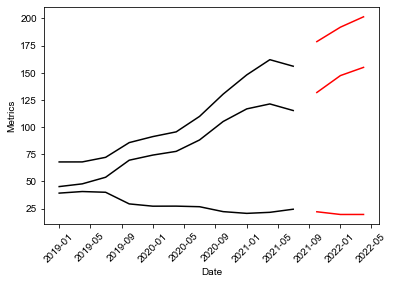

In [23]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Metrics')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()